In [3]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
# MouseConnectivityCache has a method for retrieving the adult mouse structure 
# tree as an StructureTree class instance. This is a wrapper around a list of 
# dictionaries, where each dictionary describes a structure. 
# It is principally useful for looking up structures by their properties

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json') #relative path

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

# take a look at what we know about an experiment
all_experiments.loc[307137980] #experiment I'm interested in

2992 total experiments


gender                                           M
injection_structures                         [385]
injection_volume                           0.48852
injection_x                                   8780
injection_y                                   1850
injection_z                                   8650
product_id                                       5
specimen_name                       C57BL/6-152139
strain                                    C57BL/6J
structure_abbrev                              VISp
structure_id                                   385
structure_name                 Primary visual area
transgenic_line                               None
transgenic_line_id                             NaN
id                                       307137980
primary_injection_structure                    385
Name: 307137980, dtype: object

In [4]:
# pandas for nice tables
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree() # To see only structure sets relevant to the adult mouse brain, use the StructureTree

# get info on some structures
structures = structure_tree.get_structures_by_acronym(['MOs', 'SCs'])# You can also .get_structures_by_name(['Secondary motor area'])
pd.DataFrame(structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
1,SCs,1,808,302,"Superior colliculus, sensory related","[997, 8, 343, 313, 339, 302]","[112905828, 691663206, 687527945, 10, 12, 6881...","[255, 122, 255]"


On the connectivity atlas web site, they show most of data at a fairly coarse structure level. They did this by creating a structure set of ~300 structures, which we call the "summary structures". We can use the structure tree to get all of the structures in this set

In [5]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

,description,id,name
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b
2,Summary structures of the cerebellum,688152368,Cerebellum
3,List of structures for ABA Differential Search,12,ABA - Differential Search
4,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search
5,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh
6,Summary structures of the midbrain,688152365,Midbrain
7,Summary structures of the medulla,688152367,Medulla
8,Summary structures of the striatum,688152361,Striatum
9,Structures representing subdivisions of the mo...,687527945,Mouse Connectivity - Summary


In [6]:
# From the above table, "Mouse Connectivity - Summary" has id 167587189 (??)
summary_structures = structure_tree.get_structures_by_set_id([167587189])
pd.DataFrame(summary_structures)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
...,...,...,...,...,...,...,...,...
311,FN,1,1097,989,Fastigial nucleus,"[997, 8, 512, 519, 989]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
312,IP,1,1098,91,Interposed nucleus,"[997, 8, 512, 519, 91]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
313,DN,1,1099,846,Dentate nucleus,"[997, 8, 512, 519, 846]","[112905828, 691663206, 687527945, 12, 68815236...","[255, 253, 188]"
314,VeCB,1,1100,589508455,Vestibulocerebellar nucleus,"[997, 8, 512, 519, 589508455]","[112905828, 691663206, 688152368, 184527634, 1...","[255, 253, 188]"


In [8]:
#This is how you can filter experiments by transgenic line:

# fetch the experiments that have injections in the isocortex of cre-positive mice
#isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]
#cre_cortical_experiments = mcc.get_experiments(cre=True, 
#                                                injection_structure_ids=[isocortex['id']])

#print("%d cre cortical experiments" % len(cre_cortical_experiments))

# same as before, but restrict the cre line
#rbp4_cortical_experiments = mcc.get_experiments(cre=[ 'Rbp4-Cre_KL100' ], 
#                                                injection_structure_ids=[isocortex['id']])


#print("%d Rbp4 cortical experiments" % len(rbp4_cortical_experiments))

# Structure Signal Unionization

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. MouseConnectivityCache provides methods for querying and storing this data.

In [6]:
# find wild-type injections into primary visual area
visp = structure_tree.get_structures_by_acronym(['VISp'])[0]
print(visp.keys())
visp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[visp['id']])

print("%d VISp experiments" % len(visp_experiments))

dict_keys(['acronym', 'graph_id', 'graph_order', 'id', 'name', 'structure_id_path', 'structure_set_ids', 'rgb_triplet'])
33 VISp experiments


In [75]:
# Step 1: Get the structure ID for the secondary motor area (MOs)
mosa = structure_tree.get_structures_by_acronym(['MOs'])[0]
mosa_id = mosa['id']
print("MOs ID:", mosa_id)

# Step 2: Filter experiments based on projections to the secondary motor area
#filtered_experiments = []
#for experiment in visp_experiments:
    # Check projections to the secondary motor area (MOs)
    #projections = mcc.get_structure_unionizes(
    #   [experiment['id']],
    #    is_injection=False,
    #    structure_ids=[mosa_id],
    #    include_descendants=True
    #)
    
    #if not projections.empty:
        # Check if the injection is solely in VISp
        #injection_sites = mcc.get_structure_unionizes(
        #    [experiment['id']],
        #    is_injection=True,
        #    structure_ids=[visp['id']],  # Focus on VISp injections
        #    include_descendants=False  # Do not include sub-structures of VISp
        #)
        
        # Ensure the injection is only in VISp and not empty
        #if not injection_sites.empty and injection_sites['projection_volume'].sum() > 0:
        #    filtered_experiments.append(experiment)

#print(f"Number of experiments projecting to MOs and solely injected in VISp: {len(filtered_experiments)}")


# Step 3: Visualize or work with filtered experiments
for exp in visp_experiments:
    print(f"Experiment ID: {exp['id']}, Additional Info: {exp}")


MOs ID: 993
Experiment ID: 307297141, Additional Info: {'gender': 'M', 'injection_structures': [385, 409], 'injection_volume': 0.6636360864, 'injection_x': 9230, 'injection_y': 1910, 'injection_z': 8430, 'product_id': 5, 'specimen_name': 'C57BL/6-152922', 'strain': 'C57BL/6J', 'structure_abbrev': 'VISp', 'structure_id': 385, 'structure_name': 'Primary visual area', 'transgenic_line': None, 'transgenic_line_id': None, 'id': 307297141, 'primary_injection_structure': 385}
Experiment ID: 113887162, Additional Info: {'gender': 'M', 'injection_structures': [385, 417], 'injection_volume': 0.4078438168, 'injection_x': 7900, 'injection_y': 1380, 'injection_z': 8470, 'product_id': 5, 'specimen_name': '378-1141', 'strain': 'C57BL/6J', 'structure_abbrev': 'VISp', 'structure_id': 385, 'structure_name': 'Primary visual area', 'transgenic_line': None, 'transgenic_line_id': None, 'id': 113887162, 'primary_injection_structure': 385}
Experiment ID: 180296424, Additional Info: {'gender': 'M', 'injection_

In [11]:
structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visp_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[mosa_id],
                                                  include_descendants=True
                                                 #you can add hemisphere_ids: Left = 1, Right = 2, Both = 3. If None, include all records [1, 2, 3]. Default None
                                                 )

print("%d VISp non-injection, MOs structure unionizes" % len(structure_unionizes))

594 VISp non-injection, MOs structure unionizes


In [12]:
sorted_unionizes = structure_unionizes.sort_values(by='projection_density', ascending=False)
sorted_unionizes.head(15)

,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
24,113887162,2,633272918,False,1.000000,5180,1040,5890,0.114411,0.036479,48.435970,1327.774902,0.046662,656,2.655247e+11,1.044192e+09,5.057644e+10,3.809112e+07,1.279135
34,113887162,2,633273240,False,0.550489,5260,2080,6610,0.002868,0.028834,13.839067,479.956299,0.001170,1085,3.904185e+09,3.311370e+07,4.582627e+08,9.548009e+05,0.040564
22,113887162,2,633273194,False,0.749645,5640,1500,6370,0.089212,0.027759,27.140945,977.733276,0.036384,1021,2.594354e+11,1.069978e+09,2.904023e+10,2.970159e+07,1.310724
111,307558646,2,636151718,False,0.595192,5660,1910,6620,0.001039,0.027107,14.505930,535.141663,0.001100,1085,4.955557e+09,3.311370e+07,4.803450e+08,8.976035e+05,0.040564
28,113887162,2,633273141,False,1.000000,5100,1170,5880,0.134978,0.026251,36.999176,1409.448608,0.055050,962,5.085828e+11,1.711904e+09,6.333905e+10,4.493888e+07,2.097083
369,309113907,2,636143733,False,0.544218,5360,2030,6640,0.001293,0.025093,9.438143,376.127747,0.001018,1085,2.935740e+09,3.311370e+07,3.125318e+08,8.309194e+05,0.040564
20,113887162,2,633273172,False,1.000000,5100,1170,5880,0.428716,0.024215,29.064250,1200.282577,0.174849,993,1.661686e+12,5.894563e+09,1.713210e+11,1.427339e+08,7.220839
565,309372716,2,634219113,False,0.527018,6310,1540,6520,0.000992,0.022221,5.672381,255.273453,0.000901,1085,2.095488e+09,3.311370e+07,1.878335e+08,7.358130e+05,0.040564
151,307743253,2,636148906,False,0.501035,5970,1740,6610,0.001485,0.020821,8.964292,430.539642,0.000845,1085,4.320728e+09,3.311370e+07,2.968409e+08,6.894623e+05,0.040564
124,307558646,2,636151671,False,0.689528,5920,1570,6590,0.024733,0.019973,14.771997,739.581665,0.026180,1021,2.666119e+11,1.069978e+09,1.580572e+10,2.137116e+07,1.310724


You can filter it down to a smaller list of structures like this.

In [13]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .01 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes.structure_id))

print("%d large, dense, Mos, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes.head()

22 large, dense, Mos, non-injection unionizes, 22 structures
0                Secondary motor area
1      Secondary motor area, layer 6a
2       Secondary motor area, layer 1
3                Secondary motor area
4       Secondary motor area, layer 1
5     Secondary motor area, layer 2/3
6      Secondary motor area, layer 6a
7       Secondary motor area, layer 5
8     Secondary motor area, layer 2/3
9      Secondary motor area, layer 6a
10    Secondary motor area, layer 2/3
11      Secondary motor area, layer 1
12     Secondary motor area, layer 6a
13               Secondary motor area
14      Secondary motor area, layer 1
15     Secondary motor area, layer 6a
16     Secondary motor area, layer 6a
17     Secondary motor area, layer 6a
18     Secondary motor area, layer 6a
19      Secondary motor area, layer 1
20     Secondary motor area, layer 6a
21     Secondary motor area, layer 6a
Name: name, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
20,113887162,2,633273172,False,1.000000,5100,1170,5880,0.428716,0.024215,29.064250,1200.282577,0.174849,993,1.661686e+12,5.894563e+09,1.713210e+11,1.427339e+08,7.220839
22,113887162,2,633273194,False,0.749645,5640,1500,6370,0.089212,0.027759,27.140945,977.733276,0.036384,1021,2.594354e+11,1.069978e+09,2.904023e+10,2.970159e+07,1.310724
24,113887162,2,633272918,False,1.000000,5180,1040,5890,0.114411,0.036479,48.435970,1327.774902,0.046662,656,2.655247e+11,1.044192e+09,5.057644e+10,3.809112e+07,1.279135
25,113887162,3,633274894,False,1.000000,5100,1170,5880,0.449136,0.012684,14.846321,1170.481155,0.183177,993,3.246685e+12,1.178913e+10,1.750251e+11,1.495326e+08,14.441678
26,113887162,3,633274640,False,1.000000,5180,1040,5890,0.122336,0.019503,24.877165,1275.558477,0.049894,656,5.104427e+11,2.088383e+09,5.195306e+10,4.072966e+07,2.558270


# Generating a Projection Matrix

The MouseConnectivityCache class provides a helper method for converting ProjectionStructureUnionize records for a set of experiments and structures into a matrix.

In [9]:
# This code snippet demonstrates how to make a matrix of projection
# density values in Secondary Motor Area for cre-negative VISp experiments.

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

visp_experiment_ids = [ e['id'] for e in visp_experiments ]
ctx_children = structure_tree.child_ids( [993] )[0] #993 = MOs id

pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.magma_r)

# Add a colorbar to the plot
colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Projection Density (Volume of projecting voxels/Structure volume)', fontsize=12)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

# Save the plot as a PNG file
output_filename = "projection_matrix.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

#Show the plot
plt.show()

NameError: name 'visp_experiments' is not defined

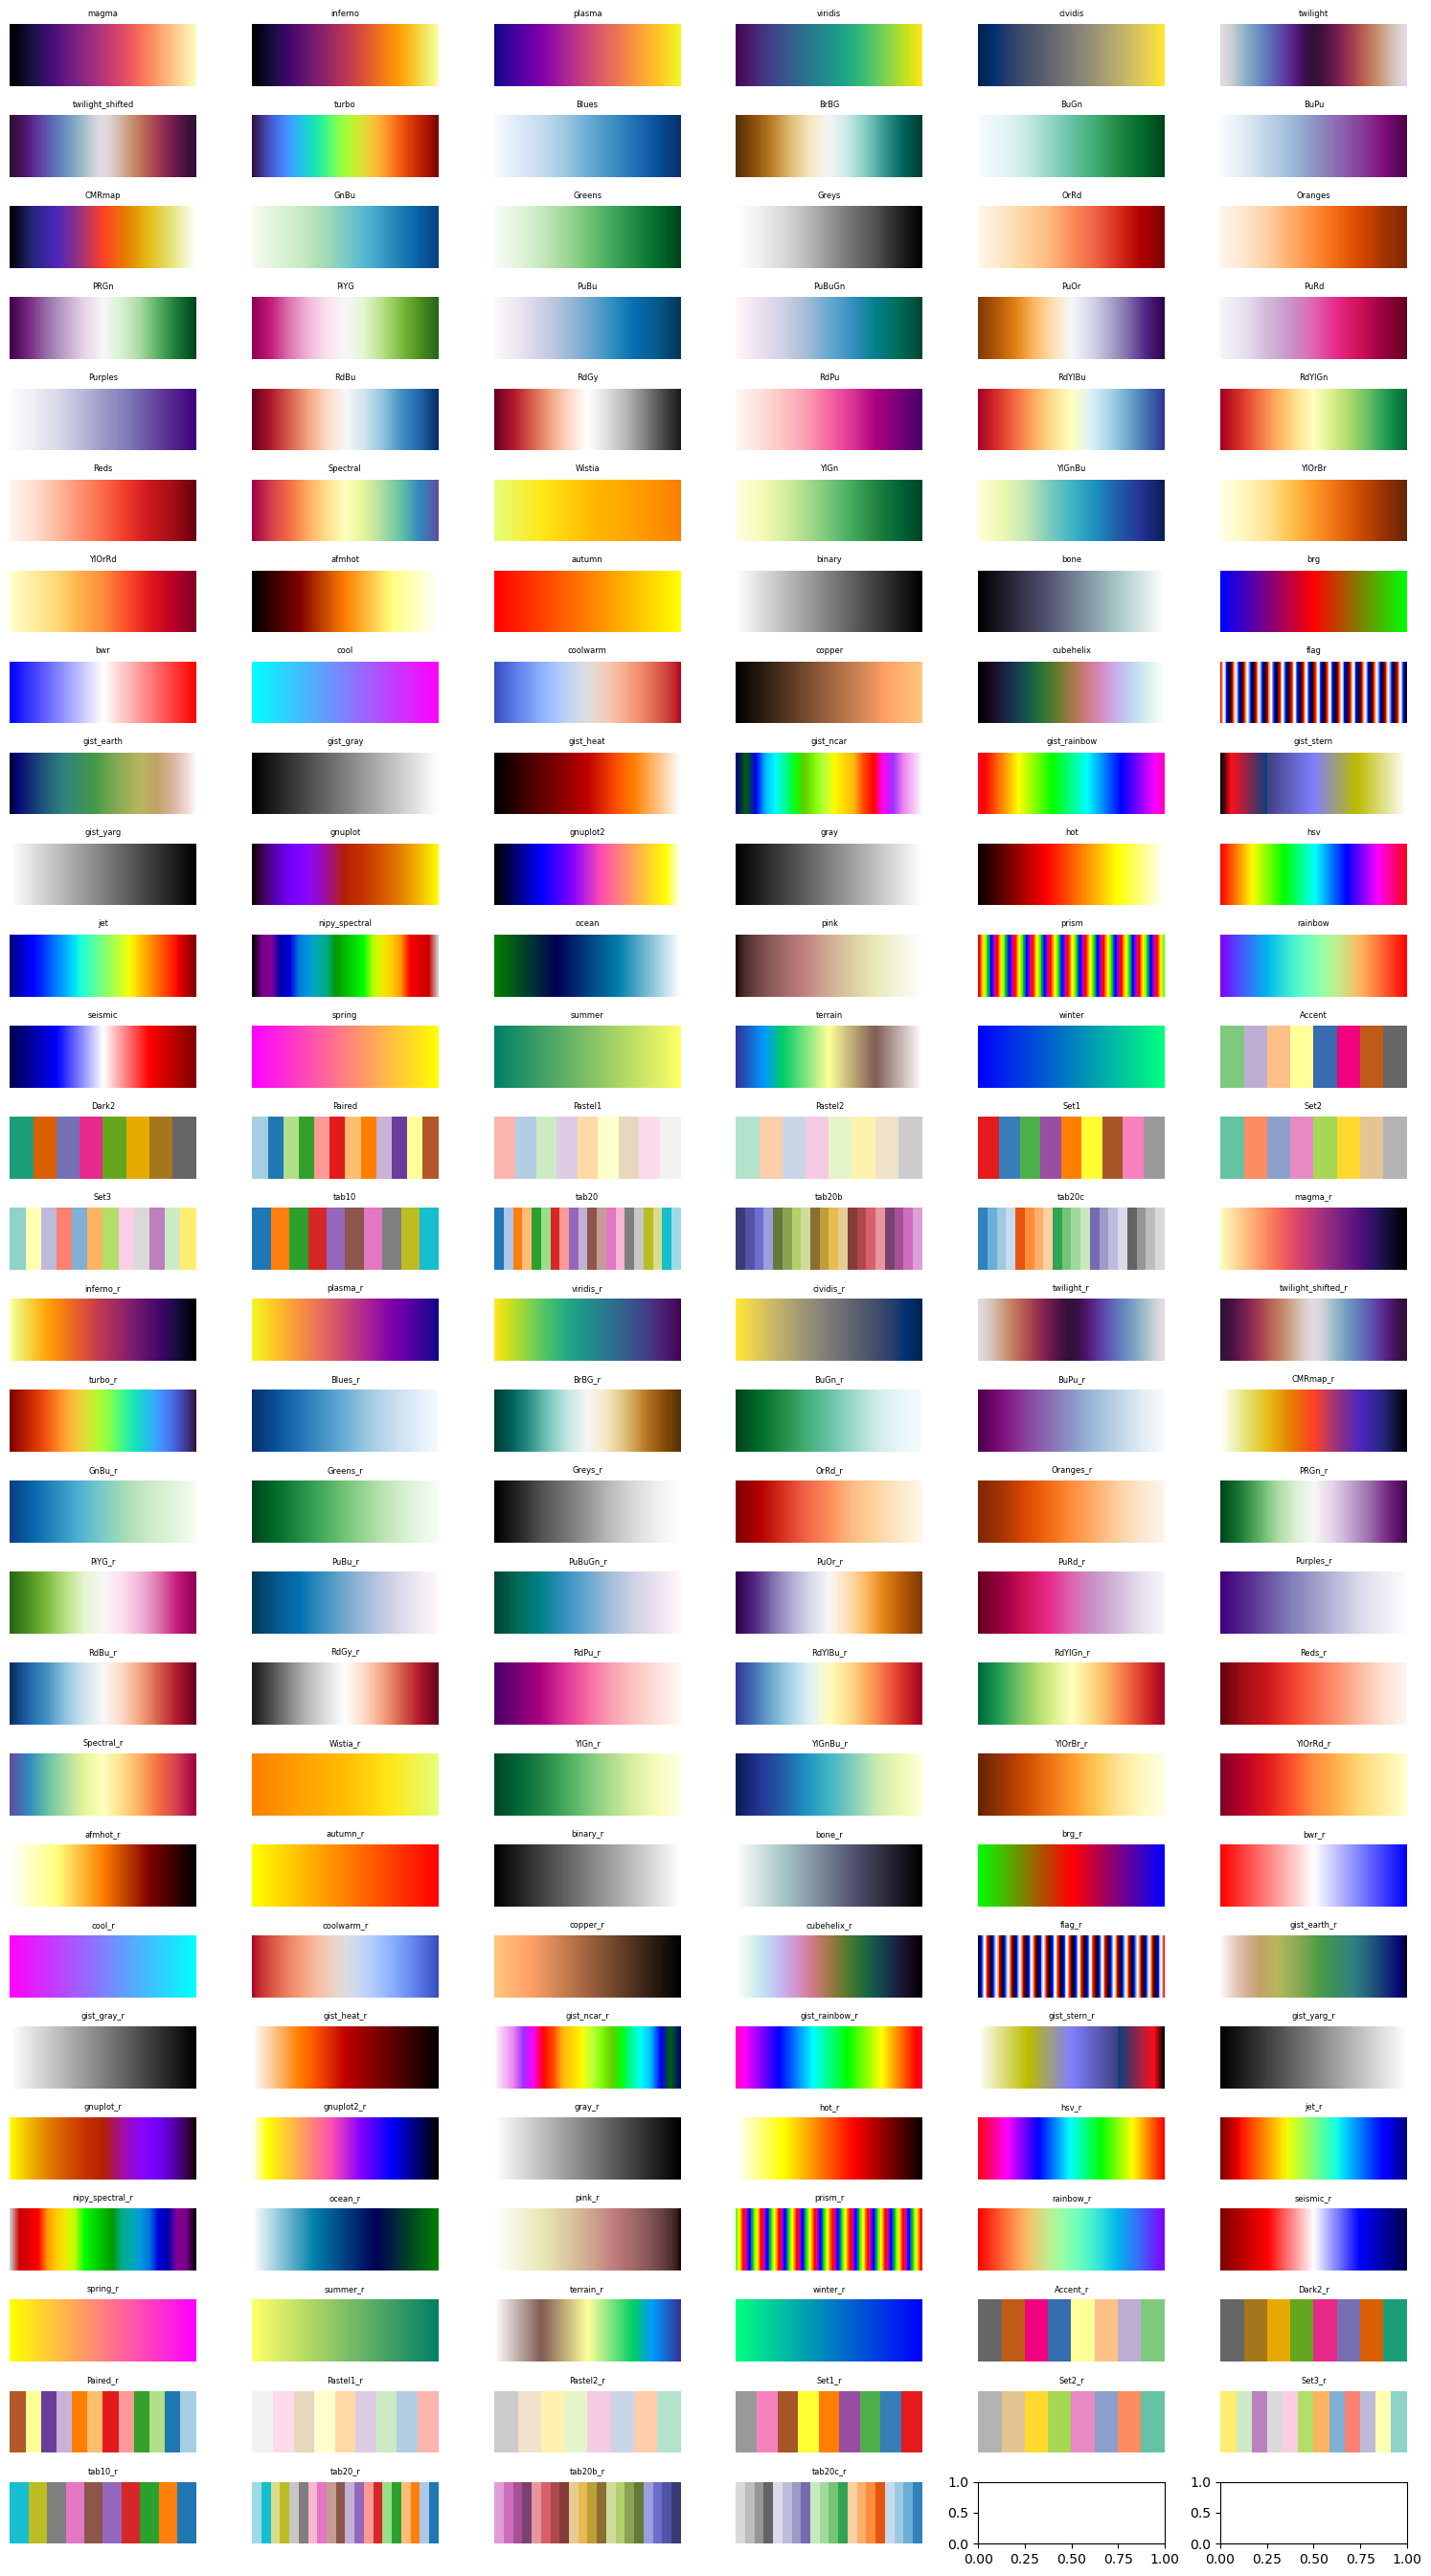

In [15]:
colormaps = plt.colormaps()
gradient = np.linspace(0, 1, 256).reshape(1, -1)

fig, axes = plt.subplots(len(colormaps)//6 + 1, 6, figsize=(15, len(colormaps)//6))
axes = axes.flatten()

for ax, cmap in zip(axes, colormaps):
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_title(cmap, fontsize=6)
    ax.axis('off')

plt.tight_layout()
plt.show()

             MOs1-R      MOs2/3-R    MOs5-R       MOs6a-R   MOs6b-R
307297141  0.001673  2.878782e-03  0.001083  4.399107e-03  0.006330
113887162  0.036479  2.625082e-02  0.014271  2.775905e-02  0.028834
180296424  0.011471  1.111514e-02  0.005322  1.479383e-02  0.012233
100147853  0.000183  1.838435e-05  0.000002  9.486575e-05  0.000170
307321674  0.001061  2.917417e-03  0.001563  5.830811e-03  0.005017
304586645  0.000325  4.521480e-04  0.000134  8.961203e-04  0.000537
307558646  0.011861  9.167061e-03  0.004905  1.997345e-02  0.027107
307320960  0.000464  6.233879e-04  0.000200  3.054389e-03  0.005243
307743253  0.007820  9.005772e-03  0.004367  1.224677e-02  0.020821
113887868  0.000278  1.083496e-05  0.000020  1.644165e-04  0.000183
307557934  0.001023  1.677445e-03  0.000444  4.731715e-03  0.005496
114008926  0.005177  6.970050e-04  0.000811  5.989419e-03  0.007308
309003780  0.000599  9.777155e-04  0.000223  2.006496e-03  0.000966
277712166  0.000359  7.194284e-05  0.000015  4.4

[Text(0, 0.5, '307297141'),
 Text(0, 1.5, '113887162'),
 Text(0, 2.5, '180296424'),
 Text(0, 3.5, '100147853'),
 Text(0, 4.5, '307321674'),
 Text(0, 5.5, '304586645'),
 Text(0, 6.5, '307558646'),
 Text(0, 7.5, '307320960'),
 Text(0, 8.5, '307743253'),
 Text(0, 9.5, '113887868'),
 Text(0, 10.5, '307557934'),
 Text(0, 11.5, '114008926'),
 Text(0, 12.5, '309003780'),
 Text(0, 13.5, '277712166'),
 Text(0, 14.5, '304565427'),
 Text(0, 15.5, '277616630'),
 Text(0, 16.5, '277714322'),
 Text(0, 17.5, '307137980'),
 Text(0, 18.5, '304585910'),
 Text(0, 19.5, '309004492'),
 Text(0, 20.5, '309113907'),
 Text(0, 21.5, '277713580'),
 Text(0, 22.5, '126862385'),
 Text(0, 23.5, '307296433'),
 Text(0, 24.5, '127138787'),
 Text(0, 25.5, '307593747'),
 Text(0, 26.5, '174361040'),
 Text(0, 27.5, '100141219'),
 Text(0, 28.5, '304564721'),
 Text(0, 29.5, '272782668'),
 Text(0, 30.5, '304762965'),
 Text(0, 31.5, '309372716'),
 Text(0, 32.5, '638314843')]

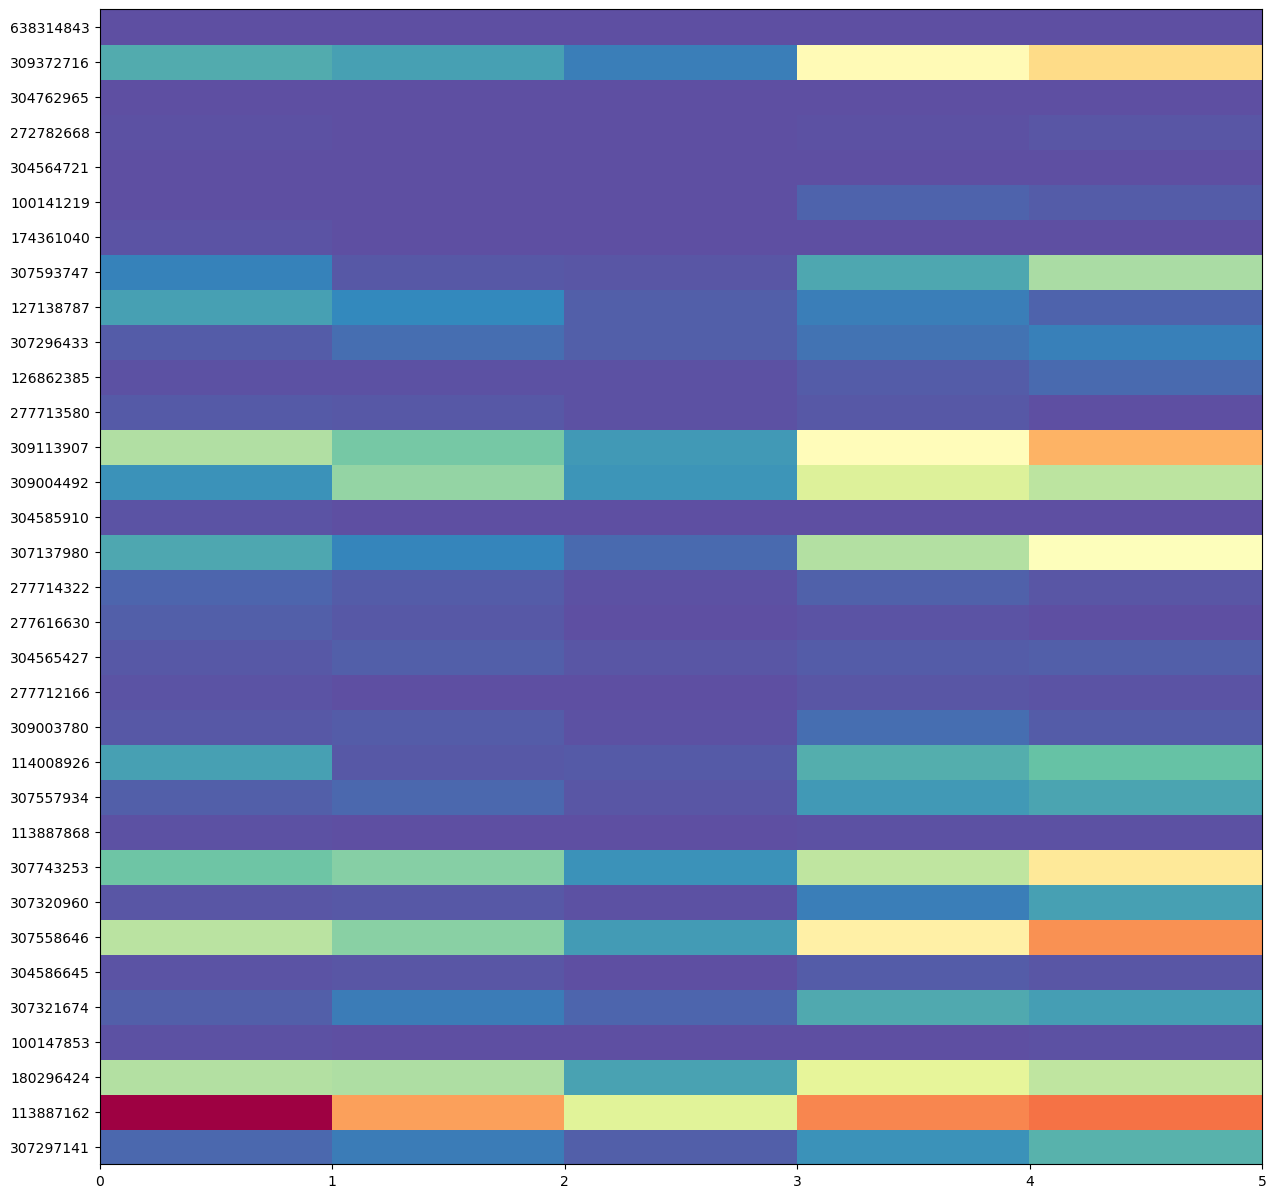

In [16]:
# Convert matrix to a NumPy array
matrix = np.array(matrix)

# Visualize projection density values
df_matrix = pd.DataFrame(matrix, index=row_labels, columns=column_labels)
print(df_matrix)

# Identify rows where all values are zero
non_zero_row_indices = np.any(matrix != 0, axis=1) 

# Filter rows and labels
filtered_matrix = matrix[non_zero_row_indices, :]
filtered_row_labels = [row_labels[i] for i in range(len(row_labels)) if non_zero_row_indices[i]]

# Update the heatmap with the filtered data
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = ax.pcolor(filtered_matrix, cmap=plt.cm.Spectral_r)

# Update y-tick labels
ax.set_yticks(np.arange(filtered_matrix.shape[0]) + 0.5, minor=False)
ax.set_yticklabels(filtered_row_labels, minor=False)

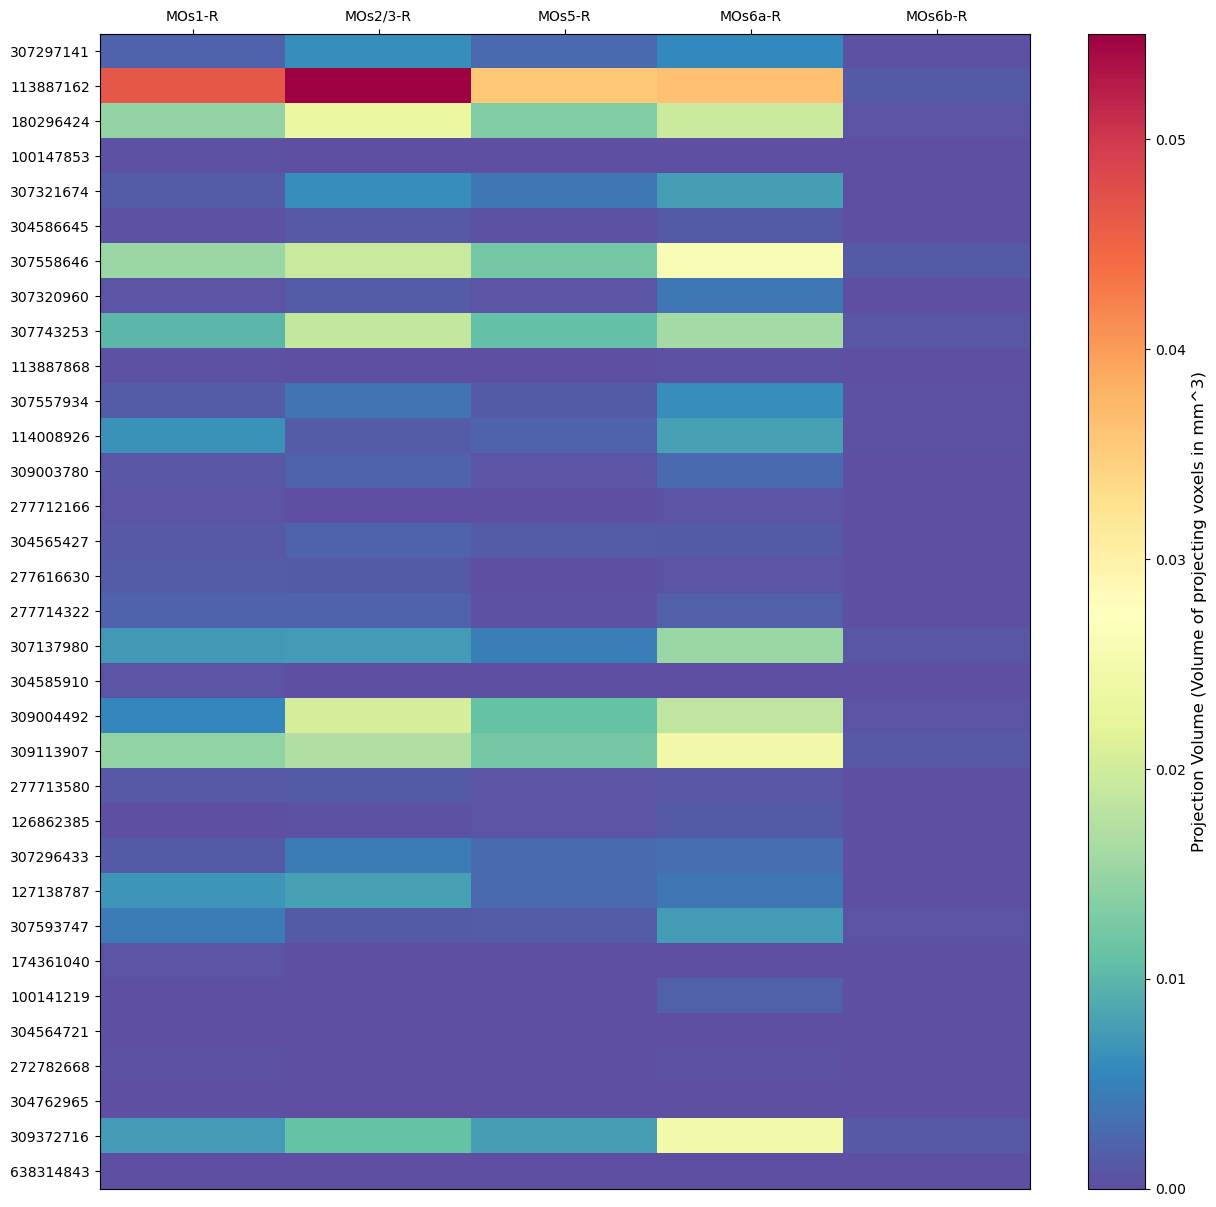

In [17]:
#Projection matrix but with projection volume data
pm_volume = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_volume') 

row_labels = pm_volume['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm_volume['columns'] ] 
matrix = pm_volume['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.Spectral_r)

# Add a colorbar to the plot
colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Projection Volume (Volume of projecting voxels in mm^3)', fontsize=12)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

# Manipulating Grid Data

The MouseConnectivityCache class also helps you download and open every experiment's projection grid data volume. By default it will download 25um volumes, but you could also download data at other resolutions if you prefer (10um, 50um, 100um).

This demonstrates how you can load the projection density for a particular experiment. It also shows how to download the template volume to which all grid data is registered. Voxels in that template have been structurally annotated by neuroanatomists and the resulting labels stored in a separate annotation volume image.

In [1]:
# injection into VISp as example
experiment_id = 307137980

In [7]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# in this case, we'll get one for the MOs
cortex_mask, cm_info = mcc.get_structure_mask(993)

print(pd_info)
print(pd.shape, template.shape, annot.shape)

OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([528, 320, 456])), ('space directions', array([[25.,  0.,  0.],
       [ 0., 25.,  0.],
       [ 0.,  0., 25.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])
(528, 320, 456) (528, 320, 456) (528, 320, 456)


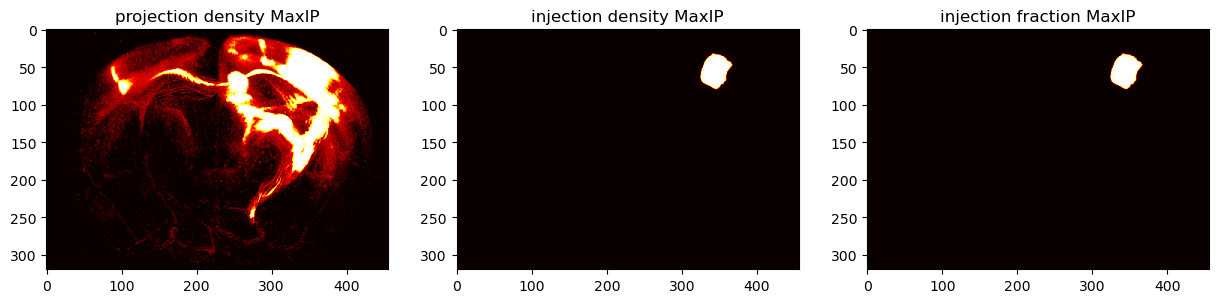

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# compute the maximum intensity projection (along the anterior-posterior axis) of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)

# show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 3, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("projection density MaxIP")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("injection density MaxIP")

pr_axes[2].imshow(inf_mip, cmap='hot', aspect='equal')
pr_axes[2].set_title("injection fraction MaxIP")

plt.show()

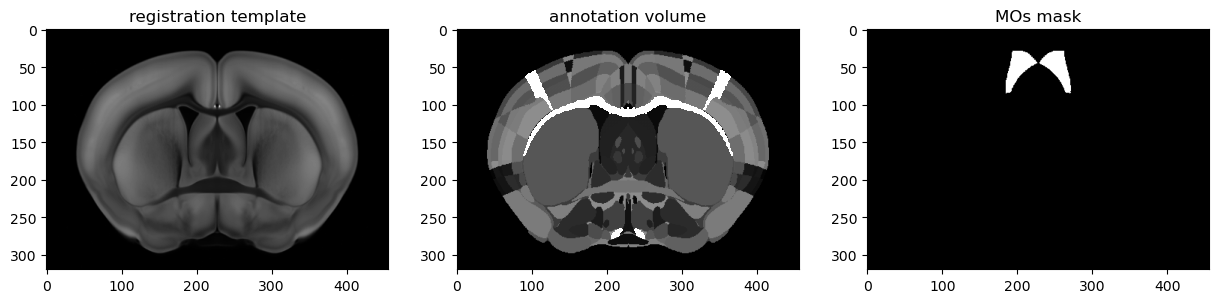

In [10]:
# Look at a slice from the average template and annotation volumes

# pick a slice to show
slice_idx = 210

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("annotation volume")

ccf_axes[2].imshow(cortex_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[2].set_title("MOs mask")

plt.show()

On occasion the TissueCyte microscope fails to acquire a tile. In this case the data from that tile should not be used for analysis. The data mask associated with each experiment can be used to determine which portions of the grid data came from correctly acquired tiles.

In this experiment, a missed tile can be seen in the data mask as a dark warped square. The values in the mask exist within [0, 1], describing the fraction of each voxel that was correctly acquired

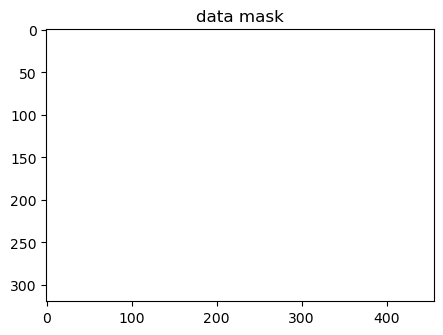

In [11]:
f, data_mask_axis = plt.subplots(figsize=(5, 6))

data_mask_axis.imshow(dm[81, :, :], cmap='hot', aspect='equal', vmin=0, vmax=1)
data_mask_axis.set_title('data mask')

plt.show()

# Working in 3D
Allen Institute has generated an average template volume from 1675 mouse brain image stacks and registering each connectivity datasets to this average template. This allows us to work in a shared 3d space, which we call the Common Coordinate Framework (CCF).
You can view the average template volume using your MouseConnectivityCache:

(528, 320, 456)


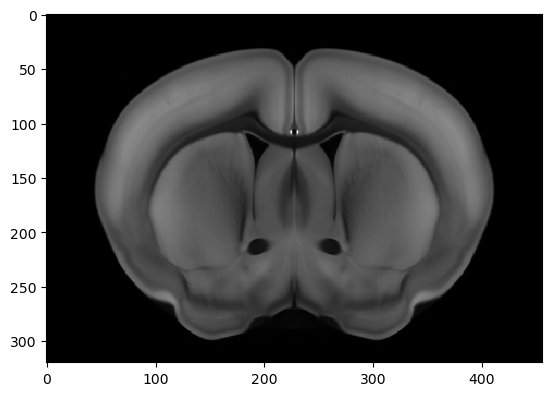

In [12]:
# load up the average template
template, header = mcc.get_template_volume()

# recall that this cache is at 25 micron isometric resolution
plt.imshow(template[200, :, :], interpolation='none', cmap=plt.cm.gray)

# how big?
print(template.shape)

The template is oriented:

anterior -> posterior

superior -> inferior

left -> right

This means that to obtain a sagittal view, we must slice along axis 2, and along axis 1 for a horizontal section (0=coronal, 1=horizontal, 2=sagittal):

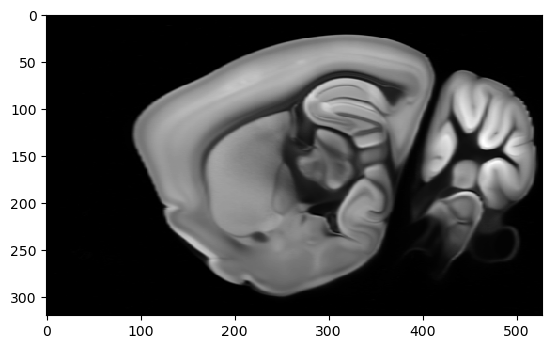

In [13]:
#Sagittal view
plt.imshow(template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

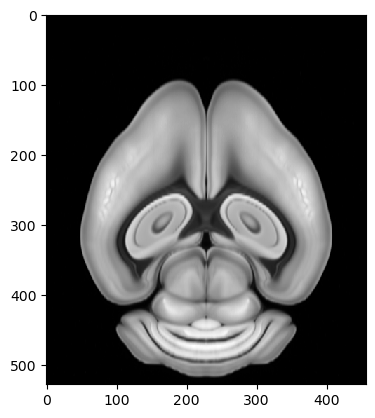

In [14]:
#Horizontal/longitudinal view
plt.imshow(template[:, 75, :], interpolation='none', cmap=plt.cm.gray)

# The annotation volume

Each (brain) voxel in the CCF is associated with a structure in the structure tree. This mapping is recorded in the annotation volume, which occupies the same space as the average template. The value of each voxel in the annotation volume is the id of the most specific structure occupying that point in space.

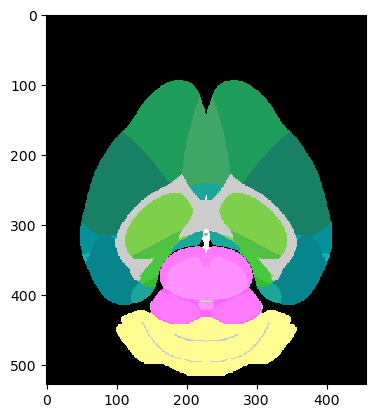

In [15]:
# you can obtain a reference space object from your mouse connectivity cache
# this object handles tasks that require both a structure tree and an annotation volume
reference_space =  mcc.get_reference_space()

# One such task is to apply our predefined structure colors to 
# a slice from the annotation volume
slice_image = reference_space.get_slice_image(1, 1875) # this method wants an axis and a position in microns
plt.imshow(slice_image, interpolation='none')

In [16]:
import pandas as pd

# you can load up the raw annotation using your MouseConnectivityCache
annotation, _ = mcc.get_annotation_volume()

#I want to find MOs (id=993)

np.where(annotation == 993) #only this would not show up anything, annotatio only labels finest structure division at each voxel
MOs_children = structure_tree.children([993])[0]

pd.DataFrame(MOs_children)


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,MOs1,1,25,656,"Secondary motor area, layer 1","[997, 8, 567, 688, 695, 315, 500, 993, 656]","[667481440, 184527634, 12, 691663206]","[31, 157, 90]"
1,MOs2/3,1,26,962,"Secondary motor area, layer 2/3","[997, 8, 567, 688, 695, 315, 500, 993, 962]","[667481441, 184527634, 12, 691663206]","[31, 157, 90]"
2,MOs5,1,27,767,"Secondary motor area, layer 5","[997, 8, 567, 688, 695, 315, 500, 993, 767]","[184527634, 12, 667481446, 691663206]","[31, 157, 90]"
3,MOs6a,1,28,1021,"Secondary motor area, layer 6a","[997, 8, 567, 688, 695, 315, 500, 993, 1021]","[667481449, 184527634, 12, 691663206]","[31, 157, 90]"
4,MOs6b,1,29,1085,"Secondary motor area, layer 6b","[997, 8, 567, 688, 695, 315, 500, 993, 1085]","[184527634, 12, 667481450, 691663206]","[31, 157, 90]"


In [17]:
# VISp, like other cortical structures, is subdivided into layers. 
# Voxels are directly assigned to the layer structures instead of to MOs
np.where(annotation==962) # 962 <==> MOs layer 2/3

(array([ 82,  82,  82, ..., 246, 246, 246], dtype=int64),
 array([95, 95, 95, ..., 31, 31, 31], dtype=int64),
 array([181, 182, 273, ..., 249, 250, 251], dtype=int64))

A couple of caveats regarding the annotation:

It is possible for a structure and its substructures to all be directly annotated. An example would be hypothalamus, which has nuclei labeled where and only where they are distinctly identifiable.

Not all structures in the structure tree are annotated or have annotated substructures.

# Structure Mask
The annotation volume and structure tree contain a lot of information in a compact form. It can be simpler to work with more explicit representations of individual structures. We often use binary indicator masks for specific structures. These are:

volumes in the common coordinate framework

1 where the annotation is labeled with a structure or its descendants, otherwise 0

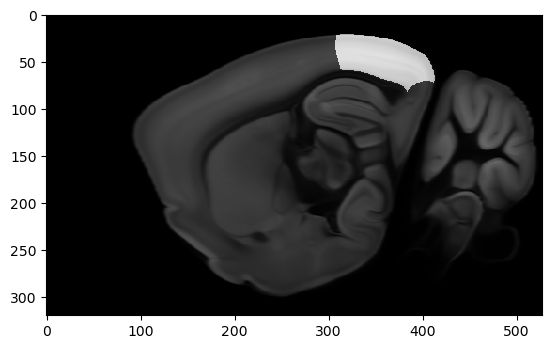

In [18]:
# view a structure mask for VISp
visp_mask, _ = mcc.get_structure_mask(385)
plt.imshow(visp_mask[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)
plt.imshow(template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray, alpha=0.4)

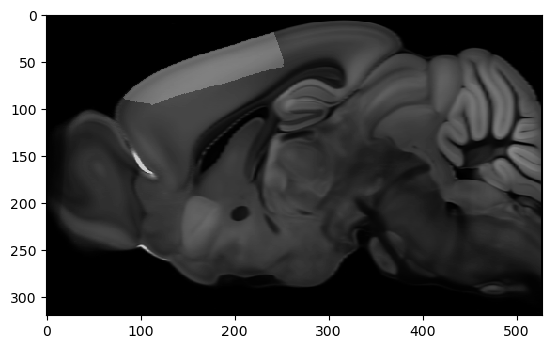

In [19]:
# view a structure mask for MOs
MOs_mask, _ = mcc.get_structure_mask(993)
plt.imshow(MOs_mask[:, :, 200].T, interpolation='none', cmap=plt.cm.gray)
plt.imshow(template[:, :, 200].T, interpolation='none', cmap=plt.cm.gray, alpha=0.8)

In [20]:
# we can now easily locate VISp/MOs-labeled voxels in space:
visp_voxel_coord = np.where(visp_mask)

MOs_voxel_coord = np.where(MOs_mask)

print(visp_voxel_coord)
print(MOs_voxel_coord)

(array([307, 307, 307, ..., 414, 414, 414], dtype=int64), array([23, 23, 24, ..., 78, 78, 78], dtype=int64), array([121, 335, 119, ..., 338, 339, 340], dtype=int64))
(array([ 77,  77,  77, ..., 258, 258, 258], dtype=int64), array([ 94, 109, 110, ...,  58,  58,  58], dtype=int64), array([278, 299, 156, ..., 261, 262, 263], dtype=int64))


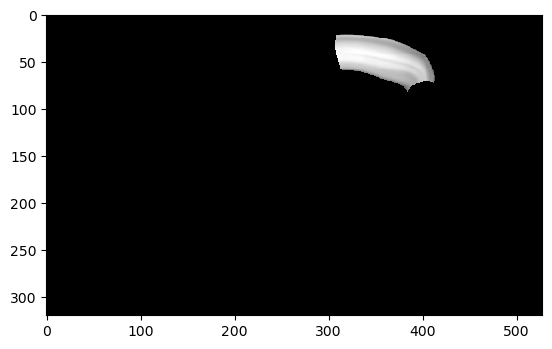

In [21]:
#We can use the coordinates to extrapolate the mask of the roi

visp_template = template.copy()

# we use 0 here for the masked value because pyplot.imshow doesn't play nice with nan.
# This is not necessarily the right choice for your application!
visp_template[visp_mask == 0] = 0
plt.imshow(visp_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

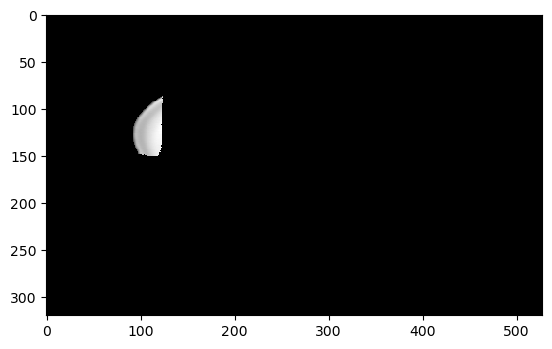

In [22]:
MOs_template = template.copy()
MOs_template[MOs_mask == 0] = 0
plt.imshow(MOs_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

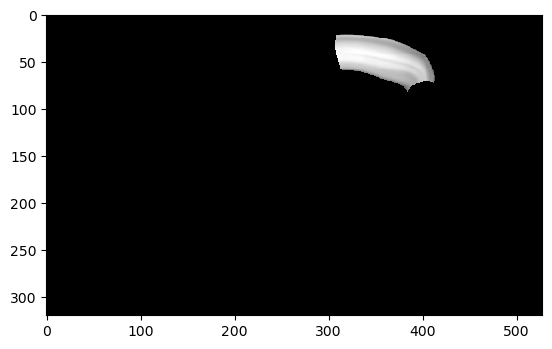

In [23]:

# We can now ask questions about the template while restricting our inquiry to VISp
# for instance, to find the mean voxelwise template intensity within visp:
visp_template.sum() / np.count_nonzero(visp_mask)
visp_template[visp_mask == 0] = 0
plt.imshow(visp_template[:, :, 125].T, interpolation='none', cmap=plt.cm.gray)

In [24]:
#Function that computes percentiles of average template intensities in selected
#structures. Use it to compare the median intensity in white and gray matter.
def get_median_template_intensity(mouse_connectivity_cache, structure_ids):
    
    mask = mouse_connectivity_cache.get_reference_space().make_structure_mask(structure_ids)
    template, _ = mouse_connectivity_cache.get_template_volume()
                        
    return np.percentile(template[mask > 0].flat, 50, interpolation='lower')

In [25]:
# find the appropriate ids
structure_tree.get_structures_by_name(['fiber tracts', 'Basic cell groups and regions'])

[{'acronym': 'fiber tracts',
  'graph_id': 1,
  'graph_order': 1101,
  'id': 1009,
  'name': 'fiber tracts',
  'structure_id_path': [997, 1009],
  'structure_set_ids': [687527945, 184527634, 167587189, 691663206],
  'rgb_triplet': [204, 204, 204]},
 {'acronym': 'grey',
  'graph_id': 1,
  'graph_order': 1,
  'id': 8,
  'name': 'Basic cell groups and regions',
  'structure_id_path': [997, 8],
  'structure_set_ids': [112905828,
   691663206,
   12,
   184527634,
   112905813,
   114512891,
   114512892],
  'rgb_triplet': [191, 218, 227]}]

In [26]:
#gm = get_median_template_intensity(mcc, [8])
#wm = get_median_template_intensity(mcc, [1009])

#print('gray: ' + str(gm))
#print('white: ' + str(wm))

# Gridded projection data
Since each connectivity experiment is registered to the CCF, we can load connectivity data in the same way as we do the average template or annotation volume.

Here we will load an experiment's projection density volume. These data:

are floats in [0, 1]

represent the fraction of each voxel that is occupied by signal (as detected in the segmentation stage)

are independent of the injection site (so it makes sense to discuss "projection in the injection site")

In [27]:
prdens, _ = mcc.get_projection_density(307137980)

In [28]:
def axis_proj(data, template, axis, bg_q=90, bg_alpha=0.5):
    # let's make some pictures
    
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)
    
    plt.imshow(data_max, interpolation='none', cmap=plt.cm.afmhot)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=0.5)

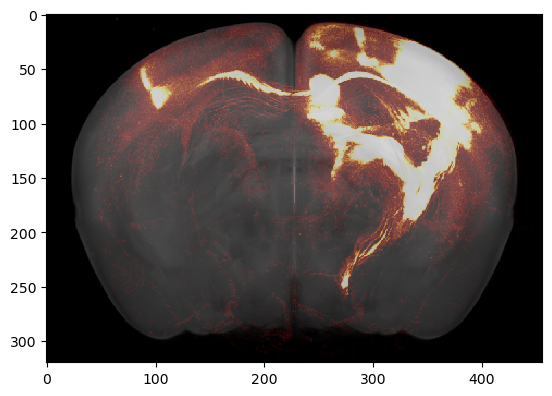

In [29]:
# make a max projection along the anterior-posterior axis for visualization
axis_proj(prdens, template, 0)

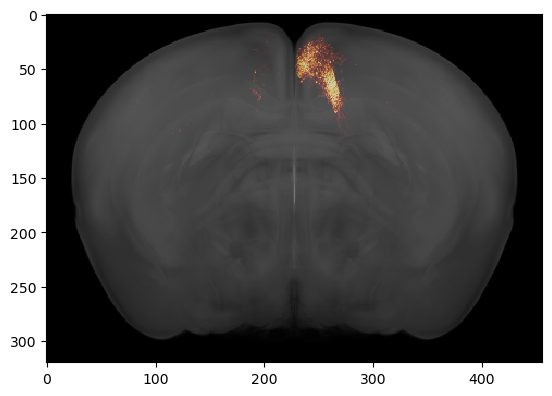

In [30]:
# now filter the signal to MOs
MOs_mask, _ = mcc.get_structure_mask(993)

prdens_MOs = prdens.copy()
prdens_MOs[MOs_mask == 0] = 0
axis_proj(prdens_MOs, template, 0) #coronal

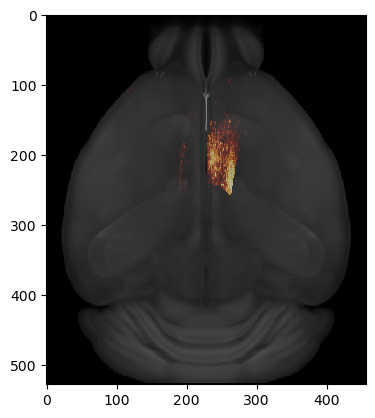

In [31]:
axis_proj(prdens_MOs, template, 1) #longitudinal

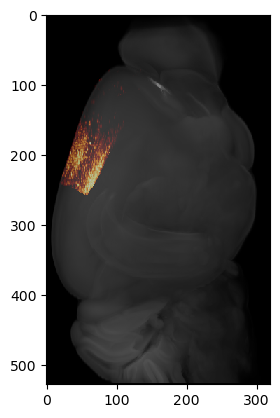

In [32]:
axis_proj(prdens_MOs, template, 2) #sagittal

In [33]:
# Another useful data volume is the injection fraction. This shows the fraction of each voxel that lies within
# this experiment's manually annotated injection site
ijfr, _ = mcc.get_injection_fraction(307137980)

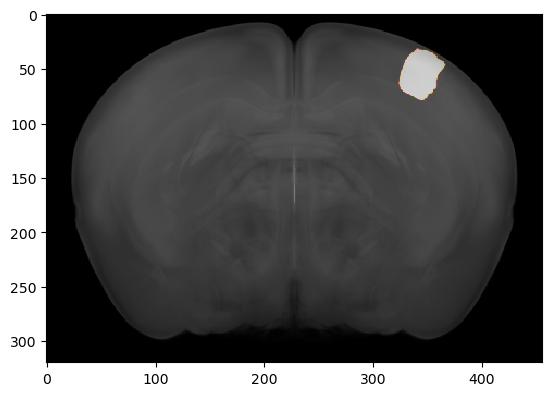

In [34]:
axis_proj(ijfr, template, 0)

In [35]:
# function that determines the density of signal within a structure (i.e. the fraction of pixels
# in all the voxels in that structure that were detected as signal).
def fraction_of_structure(mouse_connectivity_cache, structure_id, experiment_id):
    
    mask, _ = mouse_connectivity_cache.get_structure_mask(structure_id)
    
    if mask.sum() == 0:
        return 0.0
    
    projection_density, _ = mouse_connectivity_cache.get_projection_density(experiment_id)
    projection_density[mask == 0] = 0
    
    fraction = projection_density.sum() / mask.sum()
    return fraction

In [36]:
print('MOs', fraction_of_structure(mcc, 993, 307137980))
print('VISp', fraction_of_structure(mcc, 385, 307137980))

MOs 0.0024685137676762024
VISp 0.3170128327372668


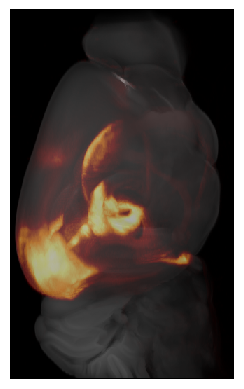

In [37]:
#Compute Average Projection Density from multiple experiments
import numpy as np
import matplotlib.pyplot as plt

# List of experiment IDs
experiment_ids = [180296424, 114008926, 309004492, 309372716, 307558646, 113887162, 307743253, 307137980, 309113907, 307321674, 307297141, 307593747, 307296433, 127138787, 307320960, 307557934, 113887868, 309003780, 126862385, 100141219, 304565427, 272782668, 304586645, 100147853, 638314843, 174361040, 277714322, 277616630, 277713580, 304564721, 277712166, 304585910, 304762965]  # Replace with actual IDs

# Initialize an array to accumulate projection densities
average_prdens = None

# Iterate through experiment IDs
for exp_id in experiment_ids:
    prdens, _ = mcc.get_projection_density(exp_id)  # Load projection density for the experiment
    if average_prdens is None:
        # Initialize the accumulator with the shape of the first experiment's data
        average_prdens = np.zeros_like(prdens, dtype=np.float32)
    average_prdens += prdens

# Compute the average
average_prdens /= len(experiment_ids)

# Visualization function (unchanged)
def axis_proj(data, template, axis, bg_q=90, bg_alpha=0.5):
    data_max = np.amax(data, axis=axis)
    template_bg = np.percentile(template, axis=axis, q=bg_q)

    plt.imshow(data_max, interpolation='none', cmap=plt.cm.afmhot)
    plt.imshow(template_bg, interpolation='none', cmap=plt.cm.gray, alpha=bg_alpha)
    plt.axis('off')

# Visualize the averaged projection density
axis_proj(average_prdens, template, 2)  # Example: max projection along anterior-posterior axis

# Save the figure as a PNG file
output_filename = "average_projection_density_VISp_sagittal.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

plt.show()


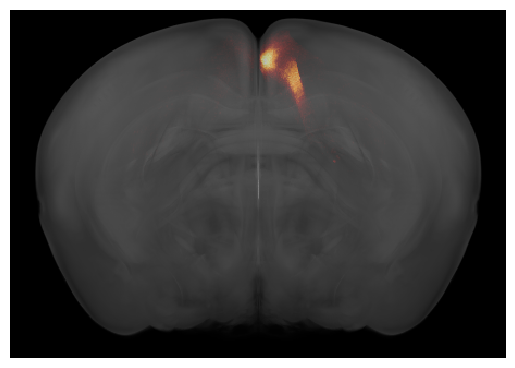

In [38]:
#Filter in MOs

prdens_MOs_average = average_prdens.copy()
prdens_MOs_average[MOs_mask == 0] = 0
axis_proj(prdens_MOs_average, template, 0) #coronal

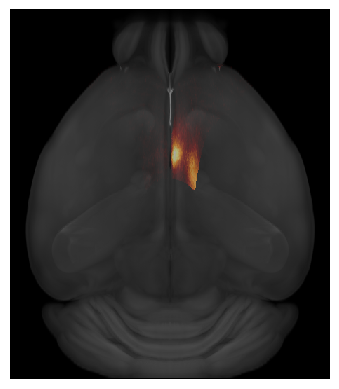

In [39]:
axis_proj(prdens_MOs_average, template, 1) #coronal

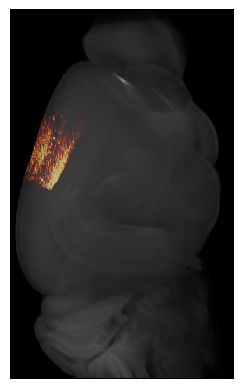

In [40]:
axis_proj(prdens_MOs, template, 2) #sagittal

In [41]:
# Initialize an array to accumulate projection densities
average_ijfr = None

# Iterate through experiment IDs
for exp_id in experiment_ids:
    ijfr, _ = mcc.get_injection_fraction(exp_id)  # Load projection density for the experiment
    if average_ijfr is None:
        # Initialize the accumulator with the shape of the first experiment's data
        average_ijfr = np.zeros_like(ijfr, dtype=np.float32)
    average_ijfr += ijfr

# Compute the average
average_ijfr /= len(experiment_ids)

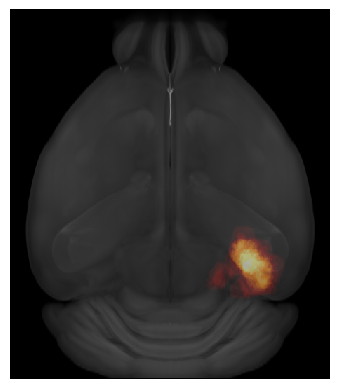

In [42]:
# Visualize the averaged injection fraction density
axis_proj(average_ijfr, template, 1)  # Example: max projection along anterior-posterior axis

In [44]:
# List of experiment IDs
experiment_ids = [
    180296424, 114008926, 309004492, 309372716, 307558646, 113887162, 
    307743253, 307137980, 309113907, 307321674, 307297141, 307593747, 
    307296433, 127138787, 307320960, 307557934, 113887868, 309003780, 
    126862385, 100141219, 304565427, 272782668, 304586645, 100147853, 
    638314843, 174361040, 277714322, 277616630, 277713580, 304564721, 
    277712166, 304585910, 304762965
]

# Get the structure IDs for your desired brain region (e.g., cortex)
structure_tree = mcc.get_structure_tree()
ctx_children = structure_tree.child_ids([993])[0]  # Example: child structures of cortex

# Fetch projection density for each experiment
projection_densities = []
for eid in experiment_ids:
    prdens, _ = mcc.get_projection_density(eid)
    projection_densities.append(prdens)

# Compute the average projection density
avg_projection_density = np.mean(projection_densities, axis=0)

# Create a custom projection matrix using averaged data
pm = mcc.get_projection_matrix(
    experiment_ids=experiment_ids,
    projection_structure_ids=ctx_children,
    hemisphere_ids=[2],  # right hemisphere, ipsilateral
    parameter='projection_density'
)

matrix = pm['matrix']
row_labels = pm['rows']
column_labels = [c['label'] for c in pm['columns']]

# Replace matrix values with the averaged projection density
# (This depends on the structure of the matrix and your specific needs)
matrix = avg_projection_density

# Visualization
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.Spectral_r)

# Add a colorbar to the plot
colorbar = plt.colorbar(heatmap, ax=ax)
colorbar.set_label('Projection Density (Volume of projecting voxels/Structure volume)', fontsize=12)

# Set tick positions and labels
ax.set_xticks(np.arange(matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])

# Adjust axes
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False, rotation=90)
ax.set_yticklabels(row_labels, minor=False)
plt.show()


MemoryError: Unable to allocate output buffer.